In [1]:

! pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd # import the Pandas Library


In [3]:
df1 = pd.read_csv("news.csv", encoding='windows-1250', header=None)
df1.columns = ['News Headlines', 'Date']
df1.dtypes
df1

,News Headlines,Date
0,Amazon Is Way Too Cheap,"Adam LyonsFri, May 31187 Comments"
1,3 Reasons To Buy Amazon Before A Potential Div...,"Dividend SenseiFri, May 3189 Comments"
2,Amazon Is Unlikely To Reward Investors With Di...,"Bluesea ResearchWed, May 2932 Comments"
3,Amazon: Ranking 'The Magnificent 7' (Midyear U...,"Blue HarbingerFri, May 2436 Comments"
4,"Amazon: Short-Term Momentum Should Continue, B...","Vladimir Dimitrov, CFAFri, May 243 Comments"
...,...,...
1905,Amazon: Standing On The Shoulders Of U.S. Cons...,"WestEnd511Mon, Aug. 01, 20166 Comments"
1906,Amazon Got Duped By Wells Fargo,"Waterman ResearchFri, Jul. 29, 201648 Comments"
1907,Whole Foods: Not That Appetizing,"L&F Capital ManagementThu, Jul. 28, 201624 Com..."
1908,"Amazon, Alphabet Crush Earnings; Oracle's (Que...","Editors' PickBret KenwellThu, Jul. 28, 201616 ..."



CODE TO ADD DATE WITH YEAR


In [4]:

from datetime import datetime
import re

newDateList = [] # create a list to store the cleaned dates

for dateOfArticles in df1['Date']: # loop every row in the "Date" column
    match = re.search(r'\w{3}\.\s\d{1,2}\,\s\d{4}|May\s\d{1,2}\,\s\d{4}|\w{3}\.\s\d{1,2}|May\s\d{1,2}',
                      dateOfArticles)

    if re.search(r'\w{3}\.\s\d{1,2}\,\s\d{4}|\w{3}\s\d{1,2}\,\s\d{4}',match[0]):
        fulldate = match[0] # don't append year to string
    else:
        fulldate = match[0] + ", 2024" # append year to string

    for fmt in ('%b. %d, %Y', '%b %d, %Y'):
        try:
            newDate = datetime.strptime(fulldate, fmt).date()
            break # if format is correct, don't test any other formats
        except ValueError:

            pass

    newDateList.append(newDate) # add new date to the list

if(len(newDateList) != df1.shape[0]):
    print("Error: Rows don't match")
else:
    df1['New Date'] = newDateList # add the list to our original dataframe



In [ ]:

df1


,News Headlines,Date,New Date
0,Amazon Is Way Too Cheap,"Adam LyonsFri, May 31187 Comments",2024-05-31
1,3 Reasons To Buy Amazon Before A Potential Div...,"Dividend SenseiFri, May 3189 Comments",2024-05-31
2,Amazon Is Unlikely To Reward Investors With Di...,"Bluesea ResearchWed, May 2932 Comments",2024-05-29
3,Amazon: Ranking 'The Magnificent 7' (Midyear U...,"Blue HarbingerFri, May 2436 Comments",2024-05-24
4,"Amazon: Short-Term Momentum Should Continue, B...","Vladimir Dimitrov, CFAFri, May 243 Comments",2024-05-24
...,...,...,...
1905,Amazon: Standing On The Shoulders Of U.S. Cons...,"WestEnd511Mon, Aug. 01, 20166 Comments",2016-08-01
1906,Amazon Got Duped By Wells Fargo,"Waterman ResearchFri, Jul. 29, 201648 Comments",2016-07-29
1907,Whole Foods: Not That Appetizing,"L&F Capital ManagementThu, Jul. 28, 201624 Com...",2016-07-28
1908,"Amazon, Alphabet Crush Earnings; Oracle's (Que...","Editors' PickBret KenwellThu, Jul. 28, 201616 ...",2016-07-28


In [5]:
df1['New Date'] = df1['New Date'].astype('datetime64[ns]')
df1.dtypes


News Headlines            object
Date                      object
New Date          datetime64[ns]
dtype: object

In [6]:
df2 = df1.groupby(['New Date']).sum() # creates a daily score by summing the scores of the individual articles in each day
df2


,News Headlines,Date
New Date,,
2016-07-28,"Whole Foods: Not That AppetizingAmazon, Alphab...","L&F Capital ManagementThu, Jul. 28, 201624 Com..."
2016-07-29,Amazon Got Duped By Wells Fargo,"Waterman ResearchFri, Jul. 29, 201648 Comments"
2016-08-01,Amazon: No Stopping This 21st Century Tech And...,"Bert HochfeldMon, Aug. 01, 201639 CommentsSram..."
2016-08-02,Amazon Expands Margins,"Quinn FoleyTue, Aug. 02, 20169 Comments"
2016-08-03,Is Whole Foods Losing Its Way?Amazon Bets Big ...,"Reuben Gregg BrewerWed, Aug. 03, 201620 Commen..."
...,...,...
2024-05-21,Amazon Stock: Nearing $2 Trillion Club From AW...,"Beth KindigTue, May 219 Comments"
2024-05-22,Why Amazon Stock Remains A Hot Ticket,"Ray MerolaWed, May 2235 Comments"
2024-05-24,Amazon: Ranking 'The Magnificent 7' (Midyear U...,"Blue HarbingerFri, May 2436 CommentsVladimir D..."


In [7]:
df2.drop(['Date'],axis=1)


,News Headlines
New Date,
2016-07-28,"Whole Foods: Not That AppetizingAmazon, Alphab..."
2016-07-29,Amazon Got Duped By Wells Fargo
2016-08-01,Amazon: No Stopping This 21st Century Tech And...
2016-08-02,Amazon Expands Margins
2016-08-03,Is Whole Foods Losing Its Way?Amazon Bets Big ...
...,...
2024-05-21,Amazon Stock: Nearing $2 Trillion Club From AW...
2024-05-22,Why Amazon Stock Remains A Hot Ticket
2024-05-24,Amazon: Ranking 'The Magnificent 7' (Midyear U...


In [9]:
import re
import nltk
from nltk.stem import  WordNetLemmatizer

In [10]:
# Download NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [12]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Applying preprocessing
df2['cleaned_headline'] = df2['News Headlines'].apply(preprocess_text)
print(df2[['News Headlines', 'cleaned_headline']])


                                               News Headlines  \
New Date                                                        
2016-07-28  Whole Foods: Not That AppetizingAmazon, Alphab...   
2016-07-29                    Amazon Got Duped By Wells Fargo   
2016-08-01  Amazon: No Stopping This 21st Century Tech And...   
2016-08-02                             Amazon Expands Margins   
2016-08-03  Is Whole Foods Losing Its Way?Amazon Bets Big ...   
...                                                       ...   
2024-05-21  Amazon Stock: Nearing $2 Trillion Club From AW...   
2024-05-22              Why Amazon Stock Remains A Hot Ticket   
2024-05-24  Amazon: Ranking 'The Magnificent 7' (Midyear U...   
2024-05-29  Amazon Is Unlikely To Reward Investors With Di...   
2024-05-31  Amazon Is Way Too Cheap3 Reasons To Buy Amazon...   

                                             cleaned_headline  
New Date                                                       
2016-07-28  whole foods no

In [13]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
# Function to apply lemmatization
def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Applying lemmatization
df2['lemmatized_headline'] = df2['cleaned_headline'].apply(lemmatize_text)
print(df2[['cleaned_headline', 'lemmatized_headline']])


                                             cleaned_headline  \
New Date                                                        
2016-07-28  whole foods not that appetizingamazon alphabet...   
2016-07-29                    amazon got duped by wells fargo   
2016-08-01  amazon no stopping this 21st century tech and ...   
2016-08-02                             amazon expands margins   
2016-08-03  is whole foods losing its wayamazon bets big o...   
...                                                       ...   
2024-05-21  amazon stock nearing 2 trillion club from aws ...   
2024-05-22              why amazon stock remains a hot ticket   
2024-05-24  amazon ranking the magnificent 7 midyear updat...   
2024-05-29  amazon is unlikely to reward investors with di...   
2024-05-31  amazon is way too cheap3 reasons to buy amazon...   

                                          lemmatized_headline  
New Date                                                       
2016-07-28  whole food not

In [14]:
df2_reset = df2.reset_index(drop=False)

df2_reset

,New Date,News Headlines,Date,cleaned_headline,lemmatized_headline
0,2016-07-28,"Whole Foods: Not That AppetizingAmazon, Alphab...","L&F Capital ManagementThu, Jul. 28, 201624 Com...",whole foods not that appetizingamazon alphabet...,whole food not that appetizingamazon alphabet ...
1,2016-07-29,Amazon Got Duped By Wells Fargo,"Waterman ResearchFri, Jul. 29, 201648 Comments",amazon got duped by wells fargo,amazon got duped by well fargo
2,2016-08-01,Amazon: No Stopping This 21st Century Tech And...,"Bert HochfeldMon, Aug. 01, 201639 CommentsSram...",amazon no stopping this 21st century tech and ...,amazon no stopping this 21st century tech and ...
3,2016-08-02,Amazon Expands Margins,"Quinn FoleyTue, Aug. 02, 20169 Comments",amazon expands margins,amazon expands margin
4,2016-08-03,Is Whole Foods Losing Its Way?Amazon Bets Big ...,"Reuben Gregg BrewerWed, Aug. 03, 201620 Commen...",is whole foods losing its wayamazon bets big o...,is whole food losing it wayamazon bet big on i...
...,...,...,...,...,...
1209,2024-05-21,Amazon Stock: Nearing $2 Trillion Club From AW...,"Beth KindigTue, May 219 Comments",amazon stock nearing 2 trillion club from aws ...,amazon stock nearing 2 trillion club from aws ...
1210,2024-05-22,Why Amazon Stock Remains A Hot Ticket,"Ray MerolaWed, May 2235 Comments",why amazon stock remains a hot ticket,why amazon stock remains a hot ticket
1211,2024-05-24,Amazon: Ranking 'The Magnificent 7' (Midyear U...,"Blue HarbingerFri, May 2436 CommentsVladimir D...",amazon ranking the magnificent 7 midyear updat...,amazon ranking the magnificent 7 midyear updat...
1212,2024-05-29,Amazon Is Unlikely To Reward Investors With Di...,"Bluesea ResearchWed, May 2932 Comments",amazon is unlikely to reward investors with di...,amazon is unlikely to reward investor with div...


In [15]:
# SUBJECTIVITY AND POLARITY
from textblob import TextBlob
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df2_reset['Subjectivity']=df2_reset['lemmatized_headline'].apply(getSubjectivity)
df2_reset['Polarity']=df2_reset['lemmatized_headline'].apply(getPolarity)
df2_reset

,New Date,News Headlines,Date,cleaned_headline,lemmatized_headline,Subjectivity,Polarity
0,2016-07-28,"Whole Foods: Not That AppetizingAmazon, Alphab...","L&F Capital ManagementThu, Jul. 28, 201624 Com...",whole foods not that appetizingamazon alphabet...,whole food not that appetizingamazon alphabet ...,0.70,-0.15
1,2016-07-29,Amazon Got Duped By Wells Fargo,"Waterman ResearchFri, Jul. 29, 201648 Comments",amazon got duped by wells fargo,amazon got duped by well fargo,0.00,0.00
2,2016-08-01,Amazon: No Stopping This 21st Century Tech And...,"Bert HochfeldMon, Aug. 01, 201639 CommentsSram...",amazon no stopping this 21st century tech and ...,amazon no stopping this 21st century tech and ...,0.00,0.00
3,2016-08-02,Amazon Expands Margins,"Quinn FoleyTue, Aug. 02, 20169 Comments",amazon expands margins,amazon expands margin,0.00,0.00
4,2016-08-03,Is Whole Foods Losing Its Way?Amazon Bets Big ...,"Reuben Gregg BrewerWed, Aug. 03, 201620 Commen...",is whole foods losing its wayamazon bets big o...,is whole food losing it wayamazon bet big on i...,0.25,0.10
...,...,...,...,...,...,...,...
1209,2024-05-21,Amazon Stock: Nearing $2 Trillion Club From AW...,"Beth KindigTue, May 219 Comments",amazon stock nearing 2 trillion club from aws ...,amazon stock nearing 2 trillion club from aws ...,0.00,0.00
1210,2024-05-22,Why Amazon Stock Remains A Hot Ticket,"Ray MerolaWed, May 2235 Comments",why amazon stock remains a hot ticket,why amazon stock remains a hot ticket,0.85,0.25
1211,2024-05-24,Amazon: Ranking 'The Magnificent 7' (Midyear U...,"Blue HarbingerFri, May 2436 CommentsVladimir D...",amazon ranking the magnificent 7 midyear updat...,amazon ranking the magnificent 7 midyear updat...,1.00,1.00
1212,2024-05-29,Amazon Is Unlikely To Reward Investors With Di...,"Bluesea ResearchWed, May 2932 Comments",amazon is unlikely to reward investors with di...,amazon is unlikely to reward investor with div...,0.55,0.10


In [16]:
#CODE FOR GETTING THE SENTIMENT SCORES
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def getSIA(text):
  sia=SentimentIntensityAnalyzer()
  sentiment=sia.polarity_scores(text)
  return sentiment

compound=[]
neg=[]
pos=[]
neu=[]
SIA=0
for i in range(0,len(df2_reset['lemmatized_headline'])):
  SIA=getSIA(df2_reset['lemmatized_headline'][i])
  compound.append(SIA['compound'])
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])

df2_reset['Compund']=compound
df2_reset['Negative']=neg
df2_reset['Neutral']=neu
df2_reset['Positive']=pos

df2_reset

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,New Date,News Headlines,Date,cleaned_headline,lemmatized_headline,Subjectivity,Polarity,Compund,Negative,Neutral,Positive
0,2016-07-28,"Whole Foods: Not That AppetizingAmazon, Alphab...","L&F Capital ManagementThu, Jul. 28, 201624 Com...",whole foods not that appetizingamazon alphabet...,whole food not that appetizingamazon alphabet ...,0.70,-0.15,-0.4215,0.153,0.847,0.000
1,2016-07-29,Amazon Got Duped By Wells Fargo,"Waterman ResearchFri, Jul. 29, 201648 Comments",amazon got duped by wells fargo,amazon got duped by well fargo,0.00,0.00,0.0000,0.292,0.312,0.396
2,2016-08-01,Amazon: No Stopping This 21st Century Tech And...,"Bert HochfeldMon, Aug. 01, 201639 CommentsSram...",amazon no stopping this 21st century tech and ...,amazon no stopping this 21st century tech and ...,0.00,0.00,-0.2732,0.149,0.784,0.067
3,2016-08-02,Amazon Expands Margins,"Quinn FoleyTue, Aug. 02, 20169 Comments",amazon expands margins,amazon expands margin,0.00,0.00,0.2732,0.000,0.244,0.756
4,2016-08-03,Is Whole Foods Losing Its Way?Amazon Bets Big ...,"Reuben Gregg BrewerWed, Aug. 03, 201620 Commen...",is whole foods losing its wayamazon bets big o...,is whole food losing it wayamazon bet big on i...,0.25,0.10,-0.3818,0.224,0.776,0.000
...,...,...,...,...,...,...,...,...,...,...,...
1209,2024-05-21,Amazon Stock: Nearing $2 Trillion Club From AW...,"Beth KindigTue, May 219 Comments",amazon stock nearing 2 trillion club from aws ...,amazon stock nearing 2 trillion club from aws ...,0.00,0.00,0.5106,0.000,0.677,0.323
1210,2024-05-22,Why Amazon Stock Remains A Hot Ticket,"Ray MerolaWed, May 2235 Comments",why amazon stock remains a hot ticket,why amazon stock remains a hot ticket,0.85,0.25,0.1779,0.000,0.746,0.254
1211,2024-05-24,Amazon: Ranking 'The Magnificent 7' (Midyear U...,"Blue HarbingerFri, May 2436 CommentsVladimir D...",amazon ranking the magnificent 7 midyear updat...,amazon ranking the magnificent 7 midyear updat...,1.00,1.00,0.4215,0.000,0.759,0.241
1212,2024-05-29,Amazon Is Unlikely To Reward Investors With Di...,"Bluesea ResearchWed, May 2932 Comments",amazon is unlikely to reward investors with di...,amazon is unlikely to reward investor with div...,0.55,0.10,0.8074,0.000,0.570,0.430


In [17]:
#FETCHING HISTORICAL DATA OF STOCK PRICES
from datetime import datetime
end = datetime.now()
start = datetime(2016,7,28)


stock = "AMZN"
hist = yf.download(stock, start, end)
hist


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-28,37.299000,37.667999,36.985001,37.630501,37.630501,152352000
2016-07-29,38.250000,38.299999,37.750000,37.940498,37.940498,135542000
2016-08-01,37.993500,38.525002,37.853001,38.387001,38.387001,71564000
2016-08-02,38.190498,38.250500,37.851002,38.028999,38.028999,72066000
2016-08-03,37.853001,37.944500,37.612499,37.731998,37.731998,71630000
...,...,...,...,...,...,...
2024-06-12,188.020004,188.350006,185.429993,186.889999,186.889999,33984200
2024-06-13,186.089996,187.669998,182.669998,183.830002,183.830002,39721500
2024-06-14,183.080002,183.720001,182.229996,183.660004,183.660004,25456400


In [18]:
# Calculate daily returns
hist['Daily Return'] = hist['Close'].pct_change()

# Display the first few rows of the data with daily returns
print(hist.head())


                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2016-07-28  37.299000  37.667999  36.985001  37.630501  37.630501  152352000   
2016-07-29  38.250000  38.299999  37.750000  37.940498  37.940498  135542000   
2016-08-01  37.993500  38.525002  37.853001  38.387001  38.387001   71564000   
2016-08-02  38.190498  38.250500  37.851002  38.028999  38.028999   72066000   
2016-08-03  37.853001  37.944500  37.612499  37.731998  37.731998   71630000   

            Daily Return  
Date                      
2016-07-28           NaN  
2016-07-29      0.008238  
2016-08-01      0.011768  
2016-08-02     -0.009326  
2016-08-03     -0.007810  


In [19]:
# Calculate cumulative return
hist['Cumulative Return'] = (1 + hist['Daily Return']).cumprod()

# Display the first few rows of the data with cumulative returns
print(hist.head())


                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2016-07-28  37.299000  37.667999  36.985001  37.630501  37.630501  152352000   
2016-07-29  38.250000  38.299999  37.750000  37.940498  37.940498  135542000   
2016-08-01  37.993500  38.525002  37.853001  38.387001  38.387001   71564000   
2016-08-02  38.190498  38.250500  37.851002  38.028999  38.028999   72066000   
2016-08-03  37.853001  37.944500  37.612499  37.731998  37.731998   71630000   

            Daily Return  Cumulative Return  
Date                                         
2016-07-28           NaN                NaN  
2016-07-29      0.008238           1.008238  
2016-08-01      0.011768           1.020103  
2016-08-02     -0.009326           1.010590  
2016-08-03     -0.007810           1.002697  


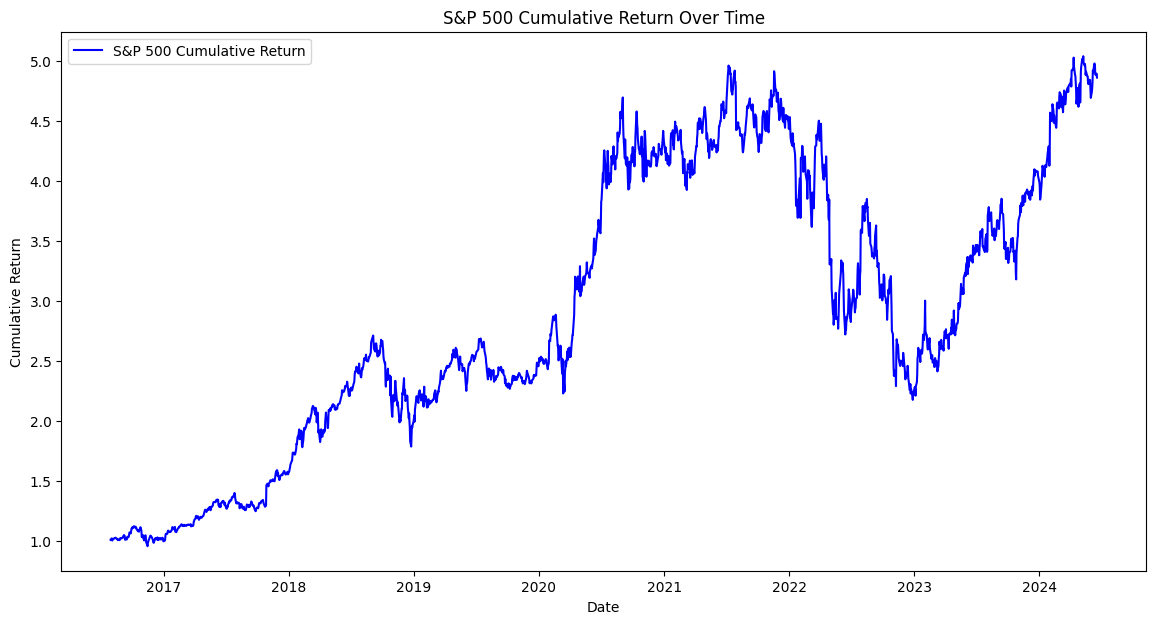

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(hist.index, hist['Cumulative Return'], label='S&P 500 Cumulative Return', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('S&P 500 Cumulative Return Over Time')
plt.legend()
plt.show()


In [21]:
# Resample to annual data and calculate annual return
annual_returns = hist['Close'].resample('Y').ffill().pct_change()

# Display annual returns
print(annual_returns)


Date
2016-12-31         NaN
2017-12-31    0.559564
2018-12-31    0.284317
2019-12-31    0.230277
2020-12-31    0.762561
2021-12-31    0.023768
2022-12-31   -0.496152
2023-12-31    0.808810
2024-12-31    0.203172
Freq: A-DEC, Name: Close, dtype: float64


In [22]:
hist_reset=hist.reset_index(inplace=True)
hist.rename(columns={"Date": "New Date"}, inplace=True)
hist


,New Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Cumulative Return
0,2016-07-28,37.299000,37.667999,36.985001,37.630501,37.630501,152352000,NaN,NaN
1,2016-07-29,38.250000,38.299999,37.750000,37.940498,37.940498,135542000,0.008238,1.008238
2,2016-08-01,37.993500,38.525002,37.853001,38.387001,38.387001,71564000,0.011768,1.020103
3,2016-08-02,38.190498,38.250500,37.851002,38.028999,38.028999,72066000,-0.009326,1.010590
4,2016-08-03,37.853001,37.944500,37.612499,37.731998,37.731998,71630000,-0.007810,1.002697
...,...,...,...,...,...,...,...,...,...
1981,2024-06-12,188.020004,188.350006,185.429993,186.889999,186.889999,33984200,-0.001816,4.966450
1982,2024-06-13,186.089996,187.669998,182.669998,183.830002,183.830002,39721500,-0.016373,4.885133
1983,2024-06-14,183.080002,183.720001,182.229996,183.660004,183.660004,25456400,-0.000925,4.880615
1984,2024-06-17,182.520004,185.000000,181.220001,184.059998,184.059998,35601900,0.002178,4.891245


In [23]:
merge=df2_reset.merge(hist, how='inner',on='New Date',)
merge

,New Date,News Headlines,Date,cleaned_headline,lemmatized_headline,Subjectivity,Polarity,Compund,Negative,Neutral,Positive,Open,High,Low,Close,Adj Close,Volume,Daily Return,Cumulative Return
0,2016-07-28,"Whole Foods: Not That AppetizingAmazon, Alphab...","L&F Capital ManagementThu, Jul. 28, 201624 Com...",whole foods not that appetizingamazon alphabet...,whole food not that appetizingamazon alphabet ...,0.70,-0.15,-0.4215,0.153,0.847,0.000,37.299000,37.667999,36.985001,37.630501,37.630501,152352000,NaN,NaN
1,2016-07-29,Amazon Got Duped By Wells Fargo,"Waterman ResearchFri, Jul. 29, 201648 Comments",amazon got duped by wells fargo,amazon got duped by well fargo,0.00,0.00,0.0000,0.292,0.312,0.396,38.250000,38.299999,37.750000,37.940498,37.940498,135542000,0.008238,1.008238
2,2016-08-01,Amazon: No Stopping This 21st Century Tech And...,"Bert HochfeldMon, Aug. 01, 201639 CommentsSram...",amazon no stopping this 21st century tech and ...,amazon no stopping this 21st century tech and ...,0.00,0.00,-0.2732,0.149,0.784,0.067,37.993500,38.525002,37.853001,38.387001,38.387001,71564000,0.011768,1.020103
3,2016-08-02,Amazon Expands Margins,"Quinn FoleyTue, Aug. 02, 20169 Comments",amazon expands margins,amazon expands margin,0.00,0.00,0.2732,0.000,0.244,0.756,38.190498,38.250500,37.851002,38.028999,38.028999,72066000,-0.009326,1.010590
4,2016-08-03,Is Whole Foods Losing Its Way?Amazon Bets Big ...,"Reuben Gregg BrewerWed, Aug. 03, 201620 Commen...",is whole foods losing its wayamazon bets big o...,is whole food losing it wayamazon bet big on i...,0.25,0.10,-0.3818,0.224,0.776,0.000,37.853001,37.944500,37.612499,37.731998,37.731998,71630000,-0.007810,1.002697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,2024-05-21,Amazon Stock: Nearing $2 Trillion Club From AW...,"Beth KindigTue, May 219 Comments",amazon stock nearing 2 trillion club from aws ...,amazon stock nearing 2 trillion club from aws ...,0.00,0.00,0.5106,0.000,0.677,0.323,182.300003,183.259995,180.750000,183.149994,183.149994,50839100,-0.002125,4.867062
1020,2024-05-22,Why Amazon Stock Remains A Hot Ticket,"Ray MerolaWed, May 2235 Comments",why amazon stock remains a hot ticket,why amazon stock remains a hot ticket,0.85,0.25,0.1779,0.000,0.746,0.254,183.880005,185.220001,181.970001,183.130005,183.130005,28148800,-0.000109,4.866531
1021,2024-05-24,Amazon: Ranking 'The Magnificent 7' (Midyear U...,"Blue HarbingerFri, May 2436 CommentsVladimir D...",amazon ranking the magnificent 7 midyear updat...,amazon ranking the magnificent 7 midyear updat...,1.00,1.00,0.4215,0.000,0.759,0.241,181.649994,182.440002,180.300003,180.750000,180.750000,27434100,-0.001657,4.803284
1022,2024-05-29,Amazon Is Unlikely To Reward Investors With Di...,"Bluesea ResearchWed, May 2932 Comments",amazon is unlikely to reward investors with di...,amazon is unlikely to reward investor with div...,0.55,0.10,0.8074,0.000,0.570,0.430,181.699997,184.080002,181.550003,182.020004,182.020004,32009300,-0.000714,4.837034


In [24]:
# Define time horizon (e.g., 1 day)
time_horizon = pd.Timedelta(days=1)

# Shift the price column to get the future price
merge['future_price'] = merge['Close'].shift(-1)

# Calculate stock price movement
merge['price_movement'] = merge['future_price'] - merge['Close']

In [ ]:
merge

,New Date,News Headlines,Date,cleaned_headline,lemmatized_headline,Subjectivity,Polarity,Compund,Negative,Neutral,...,Open,High,Low,Close,Adj Close,Volume,Daily Return,Cumulative Return,future_price,price_movement
0,2016-07-28,"Whole Foods: Not That AppetizingAmazon, Alphab...","L&F Capital ManagementThu, Jul. 28, 201624 Com...",whole foods not that appetizingamazon alphabet...,whole food not that appetizingamazon alphabet ...,0.70,-0.15,-0.4215,0.153,0.847,...,37.299000,37.667999,36.985001,37.630501,37.630501,152352000,NaN,NaN,37.940498,0.309998
1,2016-07-29,Amazon Got Duped By Wells Fargo,"Waterman ResearchFri, Jul. 29, 201648 Comments",amazon got duped by wells fargo,amazon got duped by well fargo,0.00,0.00,0.0000,0.292,0.312,...,38.250000,38.299999,37.750000,37.940498,37.940498,135542000,0.008238,1.008238,38.387001,0.446503
2,2016-08-01,Amazon: No Stopping This 21st Century Tech And...,"Bert HochfeldMon, Aug. 01, 201639 CommentsSram...",amazon no stopping this 21st century tech and ...,amazon no stopping this 21st century tech and ...,0.00,0.00,-0.2732,0.149,0.784,...,37.993500,38.525002,37.853001,38.387001,38.387001,71564000,0.011768,1.020103,38.028999,-0.358002
3,2016-08-02,Amazon Expands Margins,"Quinn FoleyTue, Aug. 02, 20169 Comments",amazon expands margins,amazon expands margin,0.00,0.00,0.2732,0.000,0.244,...,38.190498,38.250500,37.851002,38.028999,38.028999,72066000,-0.009326,1.010590,37.731998,-0.297001
4,2016-08-03,Is Whole Foods Losing Its Way?Amazon Bets Big ...,"Reuben Gregg BrewerWed, Aug. 03, 201620 Commen...",is whole foods losing its wayamazon bets big o...,is whole food losing it wayamazon bet big on i...,0.25,0.10,-0.3818,0.224,0.776,...,37.853001,37.944500,37.612499,37.731998,37.731998,71630000,-0.007810,1.002697,38.038502,0.306503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,2024-05-21,Amazon Stock: Nearing $2 Trillion Club From AW...,"Beth KindigTue, May 219 Comments",amazon stock nearing 2 trillion club from aws ...,amazon stock nearing 2 trillion club from aws ...,0.00,0.00,0.5106,0.000,0.677,...,182.300003,183.259995,180.750000,183.149994,183.149994,50839100,-0.002125,4.867062,183.130005,-0.019989
1020,2024-05-22,Why Amazon Stock Remains A Hot Ticket,"Ray MerolaWed, May 2235 Comments",why amazon stock remains a hot ticket,why amazon stock remains a hot ticket,0.85,0.25,0.1779,0.000,0.746,...,183.880005,185.220001,181.970001,183.130005,183.130005,28148800,-0.000109,4.866531,180.750000,-2.380005
1021,2024-05-24,Amazon: Ranking 'The Magnificent 7' (Midyear U...,"Blue HarbingerFri, May 2436 CommentsVladimir D...",amazon ranking the magnificent 7 midyear updat...,amazon ranking the magnificent 7 midyear updat...,1.00,1.00,0.4215,0.000,0.759,...,181.649994,182.440002,180.300003,180.750000,180.750000,27434100,-0.001657,4.803284,182.020004,1.270004
1022,2024-05-29,Amazon Is Unlikely To Reward Investors With Di...,"Bluesea ResearchWed, May 2932 Comments",amazon is unlikely to reward investors with di...,amazon is unlikely to reward investor with div...,0.55,0.10,0.8074,0.000,0.570,...,181.699997,184.080002,181.550003,182.020004,182.020004,32009300,-0.000714,4.837034,176.440002,-5.580002


In [26]:
merge["Target"] = (merge["future_price"] > merge["Close"]).astype(int) #THIS WILL SET TARGET AS 1 IF PRICE MOVEMENT IS POSITIVE OTHERWISE 0
merge

,New Date,News Headlines,Date,cleaned_headline,lemmatized_headline,Subjectivity,Polarity,Compund,Negative,Neutral,...,High,Low,Close,Adj Close,Volume,Daily Return,Cumulative Return,future_price,price_movement,Target
0,2016-07-28,"Whole Foods: Not That AppetizingAmazon, Alphab...","L&F Capital ManagementThu, Jul. 28, 201624 Com...",whole foods not that appetizingamazon alphabet...,whole food not that appetizingamazon alphabet ...,0.70,-0.15,-0.4215,0.153,0.847,...,37.667999,36.985001,37.630501,37.630501,152352000,NaN,NaN,37.940498,0.309998,1
1,2016-07-29,Amazon Got Duped By Wells Fargo,"Waterman ResearchFri, Jul. 29, 201648 Comments",amazon got duped by wells fargo,amazon got duped by well fargo,0.00,0.00,0.0000,0.292,0.312,...,38.299999,37.750000,37.940498,37.940498,135542000,0.008238,1.008238,38.387001,0.446503,1
2,2016-08-01,Amazon: No Stopping This 21st Century Tech And...,"Bert HochfeldMon, Aug. 01, 201639 CommentsSram...",amazon no stopping this 21st century tech and ...,amazon no stopping this 21st century tech and ...,0.00,0.00,-0.2732,0.149,0.784,...,38.525002,37.853001,38.387001,38.387001,71564000,0.011768,1.020103,38.028999,-0.358002,0
3,2016-08-02,Amazon Expands Margins,"Quinn FoleyTue, Aug. 02, 20169 Comments",amazon expands margins,amazon expands margin,0.00,0.00,0.2732,0.000,0.244,...,38.250500,37.851002,38.028999,38.028999,72066000,-0.009326,1.010590,37.731998,-0.297001,0
4,2016-08-03,Is Whole Foods Losing Its Way?Amazon Bets Big ...,"Reuben Gregg BrewerWed, Aug. 03, 201620 Commen...",is whole foods losing its wayamazon bets big o...,is whole food losing it wayamazon bet big on i...,0.25,0.10,-0.3818,0.224,0.776,...,37.944500,37.612499,37.731998,37.731998,71630000,-0.007810,1.002697,38.038502,0.306503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,2024-05-21,Amazon Stock: Nearing $2 Trillion Club From AW...,"Beth KindigTue, May 219 Comments",amazon stock nearing 2 trillion club from aws ...,amazon stock nearing 2 trillion club from aws ...,0.00,0.00,0.5106,0.000,0.677,...,183.259995,180.750000,183.149994,183.149994,50839100,-0.002125,4.867062,183.130005,-0.019989,0
1020,2024-05-22,Why Amazon Stock Remains A Hot Ticket,"Ray MerolaWed, May 2235 Comments",why amazon stock remains a hot ticket,why amazon stock remains a hot ticket,0.85,0.25,0.1779,0.000,0.746,...,185.220001,181.970001,183.130005,183.130005,28148800,-0.000109,4.866531,180.750000,-2.380005,0
1021,2024-05-24,Amazon: Ranking 'The Magnificent 7' (Midyear U...,"Blue HarbingerFri, May 2436 CommentsVladimir D...",amazon ranking the magnificent 7 midyear updat...,amazon ranking the magnificent 7 midyear updat...,1.00,1.00,0.4215,0.000,0.759,...,182.440002,180.300003,180.750000,180.750000,27434100,-0.001657,4.803284,182.020004,1.270004,1
1022,2024-05-29,Amazon Is Unlikely To Reward Investors With Di...,"Bluesea ResearchWed, May 2932 Comments",amazon is unlikely to reward investors with di...,amazon is unlikely to reward investor with div...,0.55,0.10,0.8074,0.000,0.570,...,184.080002,181.550003,182.020004,182.020004,32009300,-0.000714,4.837034,176.440002,-5.580002,0


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#Word Frequencies (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(merge['lemmatized_headline'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF Features:")
print(tfidf_df)


TF-IDF Features:
       10  100  1000  1000whole  10year  1135x  12619   15  150  1500i  ...  \
0     0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
1     0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
2     0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
3     0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
4     0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
...   ...  ...   ...        ...     ...    ...    ...  ...  ...    ...  ...   
1019  0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
1020  0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
1021  0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
1022  0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
1023  0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   

      yinyangamazon  youamazons  y

In [29]:
#Topic Modeling (LDA)
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda_matrix = lda.fit_transform(tfidf_df)
lda_df = pd.DataFrame(lda_matrix, columns=[f'Topic {i}' for i in range(1, lda.n_components + 1)])

print("LDA Topics:")
print(lda_df)


LDA Topics:
       Topic 1   Topic 2
0     0.850079  0.149921
1     0.193858  0.806142
2     0.651461  0.348539
3     0.793715  0.206285
4     0.361810  0.638190
...        ...       ...
1019  0.639248  0.360752
1020  0.656144  0.343856
1021  0.838784  0.161216
1022  0.821573  0.178427
1023  0.636799  0.363201

[1024 rows x 2 columns]


In [30]:
# Combine all features into a single DataFrame
features_df = pd.concat([tfidf_df,merge, lda_df], axis=1)

print("Combined Features:")
print(features_df)

Combined Features:
       10  100  1000  1000whole  10year  1135x  12619   15  150  1500i  ...  \
0     0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
1     0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
2     0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
3     0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
4     0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
...   ...  ...   ...        ...     ...    ...    ...  ...  ...    ...  ...   
1019  0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
1020  0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
1021  0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
1022  0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   
1023  0.0  0.0   0.0        0.0     0.0    0.0    0.0  0.0  0.0    0.0  ...   

           Close   Adj Close    

In [31]:
df_final=features_df.drop(['News Headlines','Date','lemmatized_headline','New Date','cleaned_headline','Close','Daily Return','Adj Close','Cumulative Return','future_price','price_movement'], axis='columns')
df_final

,10,100,1000,1000whole,10year,1135x,12619,15,150,1500i,...,Negative,Neutral,Positive,Open,High,Low,Volume,Target,Topic 1,Topic 2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.153,0.847,0.000,37.299000,37.667999,36.985001,152352000,1,0.850079,0.149921
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.292,0.312,0.396,38.250000,38.299999,37.750000,135542000,1,0.193858,0.806142
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.149,0.784,0.067,37.993500,38.525002,37.853001,71564000,0,0.651461,0.348539
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.244,0.756,38.190498,38.250500,37.851002,72066000,0,0.793715,0.206285
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.224,0.776,0.000,37.853001,37.944500,37.612499,71630000,1,0.361810,0.638190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.677,0.323,182.300003,183.259995,180.750000,50839100,0,0.639248,0.360752
1020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.746,0.254,183.880005,185.220001,181.970001,28148800,0,0.656144,0.343856
1021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.759,0.241,181.649994,182.440002,180.300003,27434100,1,0.838784,0.161216
1022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.570,0.430,181.699997,184.080002,181.550003,32009300,0,0.821573,0.178427


In [32]:
df_final.columns = df_final.columns.astype(str)

In [33]:
#DECIDING FEATURE SET AND TARGET SET
x=df_final.drop(['Target'],axis='columns')
y=df_final['Target']

In [34]:
print(x.shape)
print(y.shape)

(1024, 2662)
(1024,)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
#SPLITTING TRAINING AND TESTING SET
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearDiscriminantAnalysis().fit(x_train,y_train)

In [37]:
y_pred=model.predict(x_test)

In [38]:
len(y_pred)
len(y_test)

205

In [39]:
accuracy_score(y_pred,y_test)

0.5121951219512195

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))

[[52 59]
 [41 53]]
              precision    recall  f1-score   support

           0       0.56      0.47      0.51       111
           1       0.47      0.56      0.51        94

    accuracy                           0.51       205
   macro avg       0.52      0.52      0.51       205
weighted avg       0.52      0.51      0.51       205



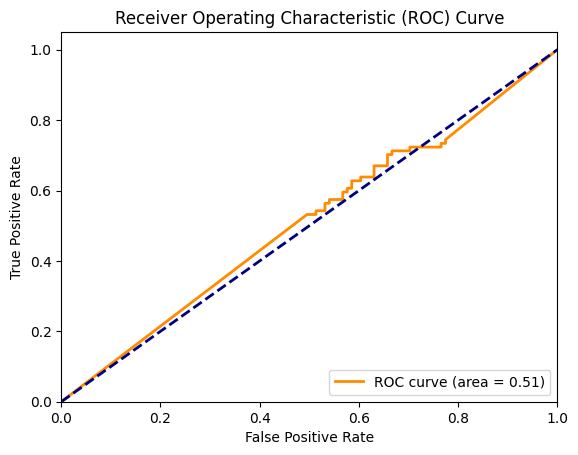

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [43]:
y_pred2=model.predict(x)
y_pred2=pd.DataFrame(y_pred2,columns=['Label'])
y_pred2

,Label
0,1
1,1
2,0
3,1
4,1
...,...
1019,1
1020,0
1021,1
1022,0


In [44]:
accuracy_score(y_pred2,y)

0.90234375

In [45]:
conf_matrix = confusion_matrix(y_pred2, y)
print(conf_matrix)
print(classification_report(y_pred2,y))

[[416  41]
 [ 59 508]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       457
           1       0.93      0.90      0.91       567

    accuracy                           0.90      1024
   macro avg       0.90      0.90      0.90      1024
weighted avg       0.90      0.90      0.90      1024



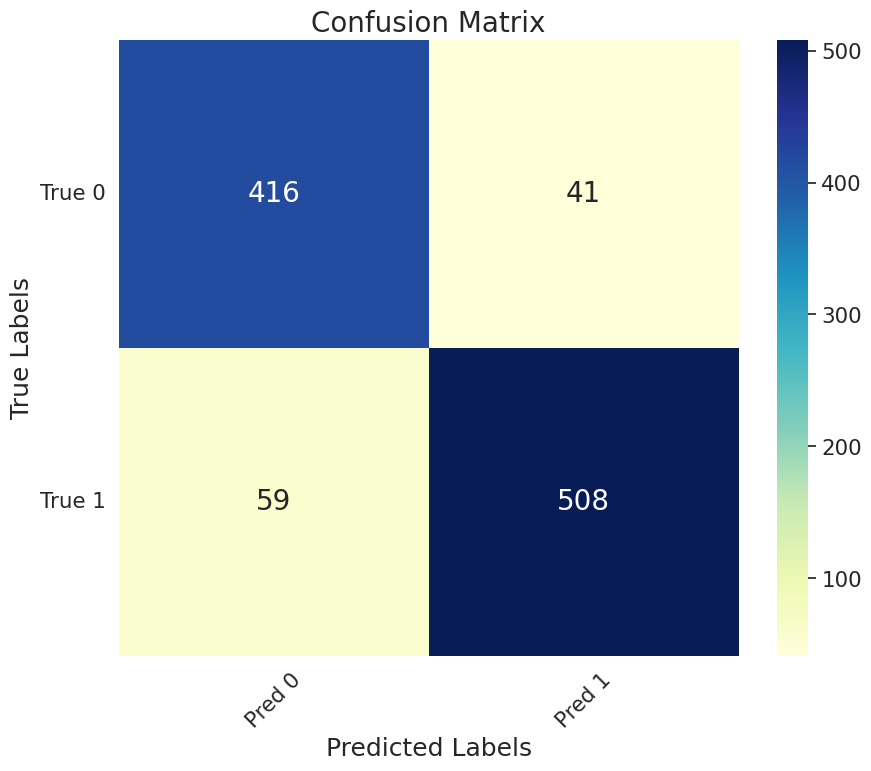

In [46]:
# Plot the confusion matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True,
            annot_kws={"size": 20},  # size of numbers in cells
            xticklabels=['Pred 0', 'Pred 1', ],
            yticklabels=['True 0', 'True 1', ])

plt.xlabel('Predicted Labels', fontsize=18)
plt.ylabel('True Labels', fontsize=18)
plt.title('Confusion Matrix', fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

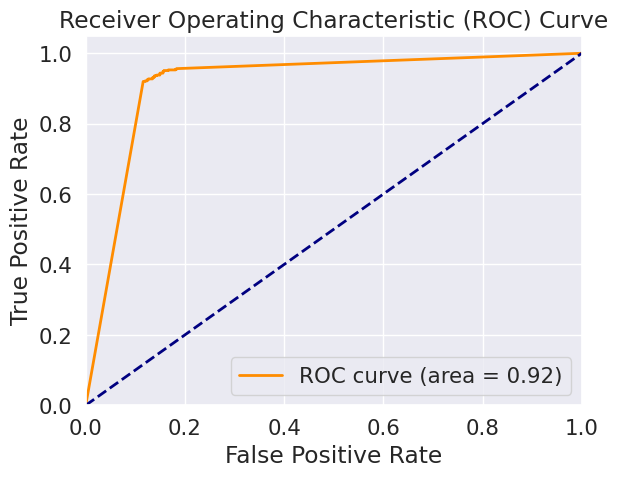

In [47]:
# Predict probabilities for the positive class
y_probs1 = model.predict_proba(x)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y, y_probs1)
roc_auc = roc_auc_score(y, y_probs1)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [48]:
keep_columns1=['New Date','Open','Low','High','Close']
df5=merge[keep_columns1]
df5

,New Date,Open,Low,High,Close
0,2016-07-28,37.299000,36.985001,37.667999,37.630501
1,2016-07-29,38.250000,37.750000,38.299999,37.940498
2,2016-08-01,37.993500,37.853001,38.525002,38.387001
3,2016-08-02,38.190498,37.851002,38.250500,38.028999
4,2016-08-03,37.853001,37.612499,37.944500,37.731998
...,...,...,...,...,...
1019,2024-05-21,182.300003,180.750000,183.259995,183.149994
1020,2024-05-22,183.880005,181.970001,185.220001,183.130005
1021,2024-05-24,181.649994,180.300003,182.440002,180.750000
1022,2024-05-29,181.699997,181.550003,184.080002,182.020004


In [49]:
df6= pd.concat([df5, y_pred2], axis=1)
df6

,New Date,Open,Low,High,Close,Label
0,2016-07-28,37.299000,36.985001,37.667999,37.630501,1
1,2016-07-29,38.250000,37.750000,38.299999,37.940498,1
2,2016-08-01,37.993500,37.853001,38.525002,38.387001,0
3,2016-08-02,38.190498,37.851002,38.250500,38.028999,1
4,2016-08-03,37.853001,37.612499,37.944500,37.731998,1
...,...,...,...,...,...,...
1019,2024-05-21,182.300003,180.750000,183.259995,183.149994,1
1020,2024-05-22,183.880005,181.970001,185.220001,183.130005,0
1021,2024-05-24,181.649994,180.300003,182.440002,180.750000,1
1022,2024-05-29,181.699997,181.550003,184.080002,182.020004,0



# TRADING STRATEGY


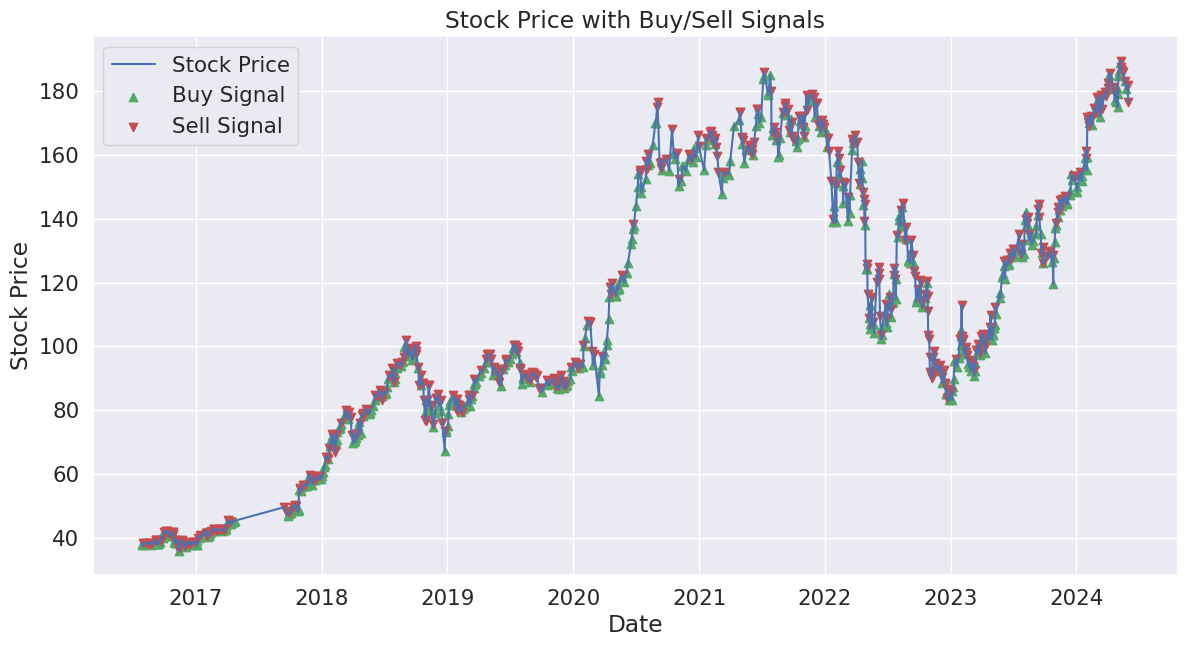

In [50]:
# Parameters
stop_loss = 0.05  # 5% stop-loss
take_profit = 0.10  # 10% take-profit

# Backtesting with stop-loss and take-profit
initial_capital=10000
cash = initial_capital
position = 0
buy_price = 0
portfolio_values = []

for i in range(len(df6)):
    if df6.iloc[i]['Label'] == 1 and cash > df6.iloc[i]['Open']:  # Buy
        position = cash / df6.iloc[i]['Open']
        cash = 0
        buy_price = df6.iloc[i]['Open']
    elif df6.iloc[i]['Label'] == 0 and position > 0:  # Sell
        cash = position * df6.iloc[i]['Open']
        position = 0
    elif position > 0:
        # Check stop-loss and take-profit
        if df6.iloc[i]['Low'] < buy_price * (1 - stop_loss):
            cash = position * df6.iloc[i]['Low']
            position = 0
        elif df6.iloc[i]['High'] > buy_price * (1 + take_profit):
            cash = position * df6.iloc[i]['High']
            position = 0
    portfolio_value = cash + position * df6.iloc[i]['Close']
    portfolio_values.append(portfolio_value)


# Plot stock prices and signals
plt.figure(figsize=(14, 7))
plt.plot(df6['New Date'], df6['Close'], label='Stock Price')
plt.scatter(df6[df6['Label'] == 1]['New Date'], df6[df6['Label'] == 1]['Close'], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(df6[df6['Label'] == 0]['New Date'], df6[df6['Label'] == 0]['Close'], marker='v', color='r', label='Sell Signal', alpha=1)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Stock Price with Buy/Sell Signals')
plt.show()



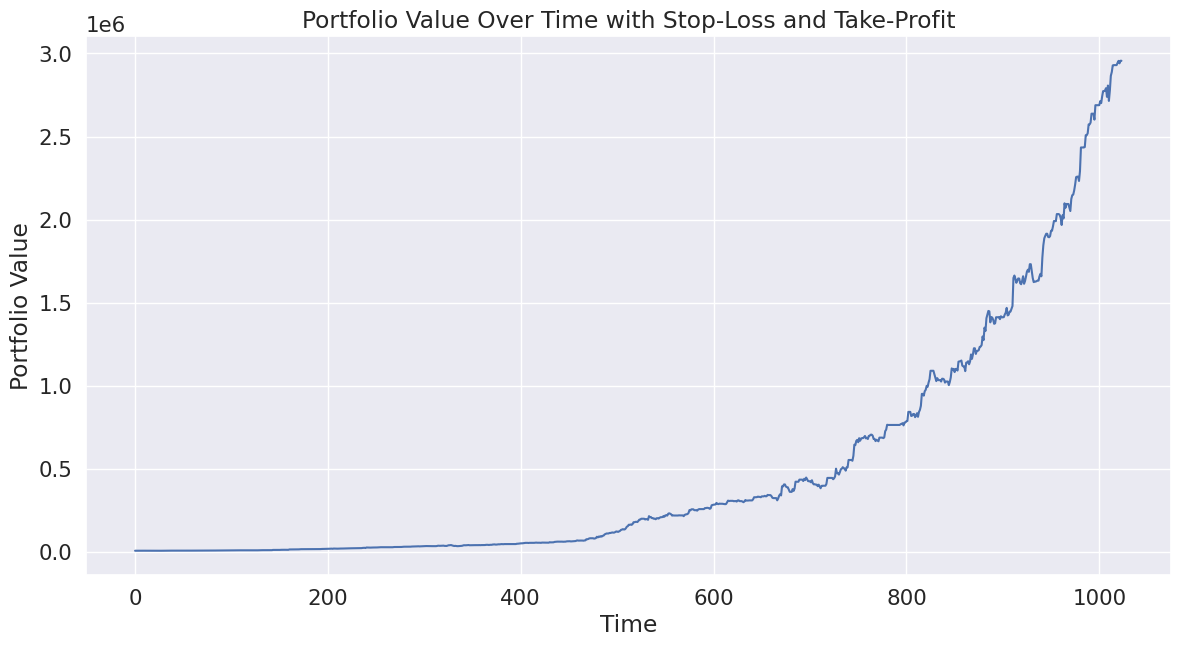

Final Portfolio Value with Stop-Loss and Take-Profit: $2956278.63
Total Return with Stop-Loss and Take-Profit: 294.6279


In [51]:
# Plot the portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(portfolio_values)
plt.title('Portfolio Value Over Time with Stop-Loss and Take-Profit')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')


plt.show()

# Calculate final portfolio value and return
final_portfolio_value = portfolio_values[-1]
total_return = (final_portfolio_value - initial_capital) / initial_capital
print(f'Final Portfolio Value with Stop-Loss and Take-Profit: ${final_portfolio_value:.2f}')
print(f'Total Return with Stop-Loss and Take-Profit: {total_return:.4f}')

In [52]:
# Calculate daily returns
df6['Return'] = df6['Close'].pct_change()

# Calculate strategy returns based on signals|
df6['StrategyReturn'] = df6['Return'] * df6['Label'].shift(1)
# Annualized return and standard deviation
annualized_return = df6['StrategyReturn'].mean() * 252
annualized_volatility = df6['StrategyReturn'].std() * np.sqrt(252)

# Assuming a risk-free rate of 0 for simplicity
sharpe_ratio = annualized_return / annualized_volatility
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 7.84


In [53]:
# Calculate cumulative returns
df6['CumulativeReturn'] = (1 + df6['StrategyReturn']).cumprod()

# Calculate drawdowns
df6['CumulativeMax'] = df6['CumulativeReturn'].cummax()
df6['Drawdown'] = df6['CumulativeReturn'] / df6['CumulativeMax'] - 1

# Maximum drawdown
max_drawdown = df6['Drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown:.2%}")

Maximum Drawdown: -6.21%


In [54]:
# Count the number of trades executed
num_trades = df6['Label'].diff().abs().sum()  # assuming each change in signal is a trade
print(f"Number of Trades Executed: {num_trades}")

Number of Trades Executed: 495.0


In [55]:
# Calculate individual trade returns
df6['TradeReturn'] = df6['StrategyReturn'][df6['Label'] != 0]

# Count winning trades
num_winning_trades = df6['TradeReturn'][df6['TradeReturn'] > 0].count()
num_losing_trades = df6['TradeReturn'][df6['TradeReturn'] <= 0].count()

# Win ratio
win_ratio = num_winning_trades / (num_winning_trades + num_losing_trades)
print(f"Win Ratio: {win_ratio:.2%}")


Win Ratio: 49.47%


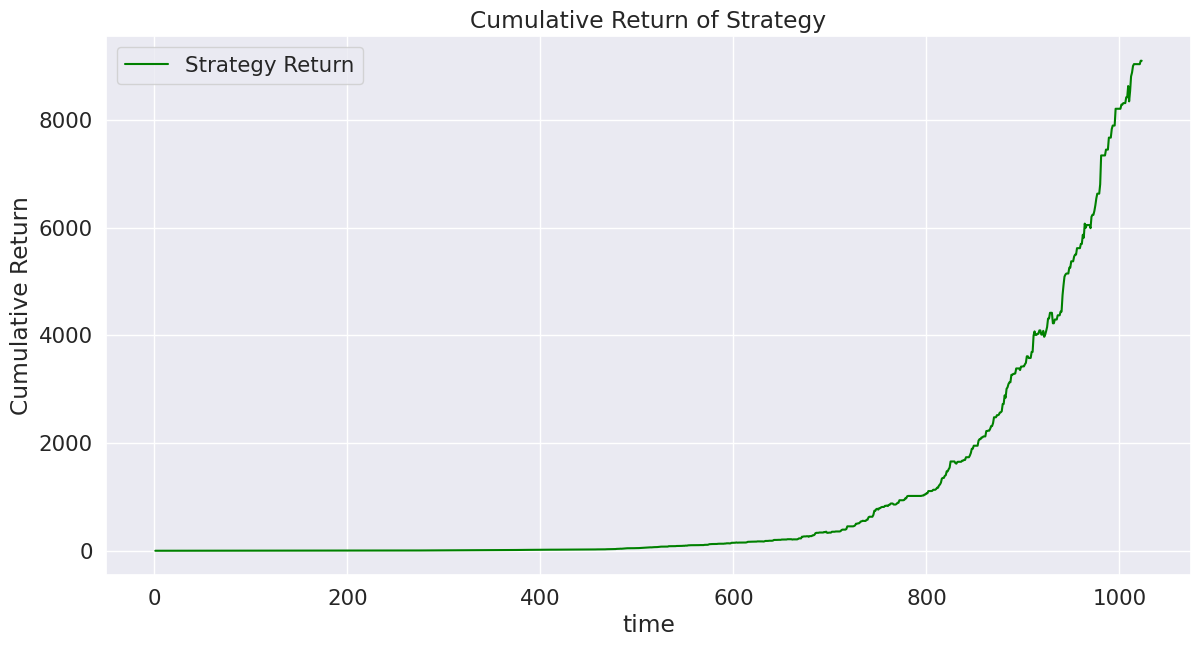

In [56]:
# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(df6.index, df6['CumulativeReturn'], label='Strategy Return', color='green')
plt.xlabel('time')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of Strategy')
plt.legend()
plt.show()